# Table of Contents
 <p>

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from __future__ import division
from collections import Counter
from Bio import SeqIO

from pyseqlogo.pyseqlogo import draw_logo

human_aa_fasta = '/media/dna/genomes/amino_acid/gencode.v27.pc_translations.fa'
human_aa = Counter()
with open(human_aa_fasta) as f:
    for record in SeqIO.parse(f, 'fasta'):
        human_aa+=Counter(record.seq)

Populating the interactive namespace from numpy and matplotlib


In [3]:
human_total = sum(list(human_aa.viewvalues()))

merry = ['M', 'E', 'R', 'R', 'Y']
christmas = ['C', 'H', 'R', 'I', 'S', 'T', 'M', 'A', 'S']

data_merry = [[(x, 20*float(human_aa[x])/human_total)] for x in merry]
data_christmas = [[(x, 20*float(human_aa[x])/human_total)] for x in christmas]

In [ ]:
plt.rcParams['figure.dpi'] = 1000
plt.rcParams['savefig.dpi'] = 1000
_, _ = draw_logo(data_merry, 
                 coordinate_type='display', 
                 data_type='bits', 
                 yaxis='probability',
                 colorscheme='physiochemical',
                 fontfamily='Monospace')
plt.savefig('merry.png', dpi=1000)

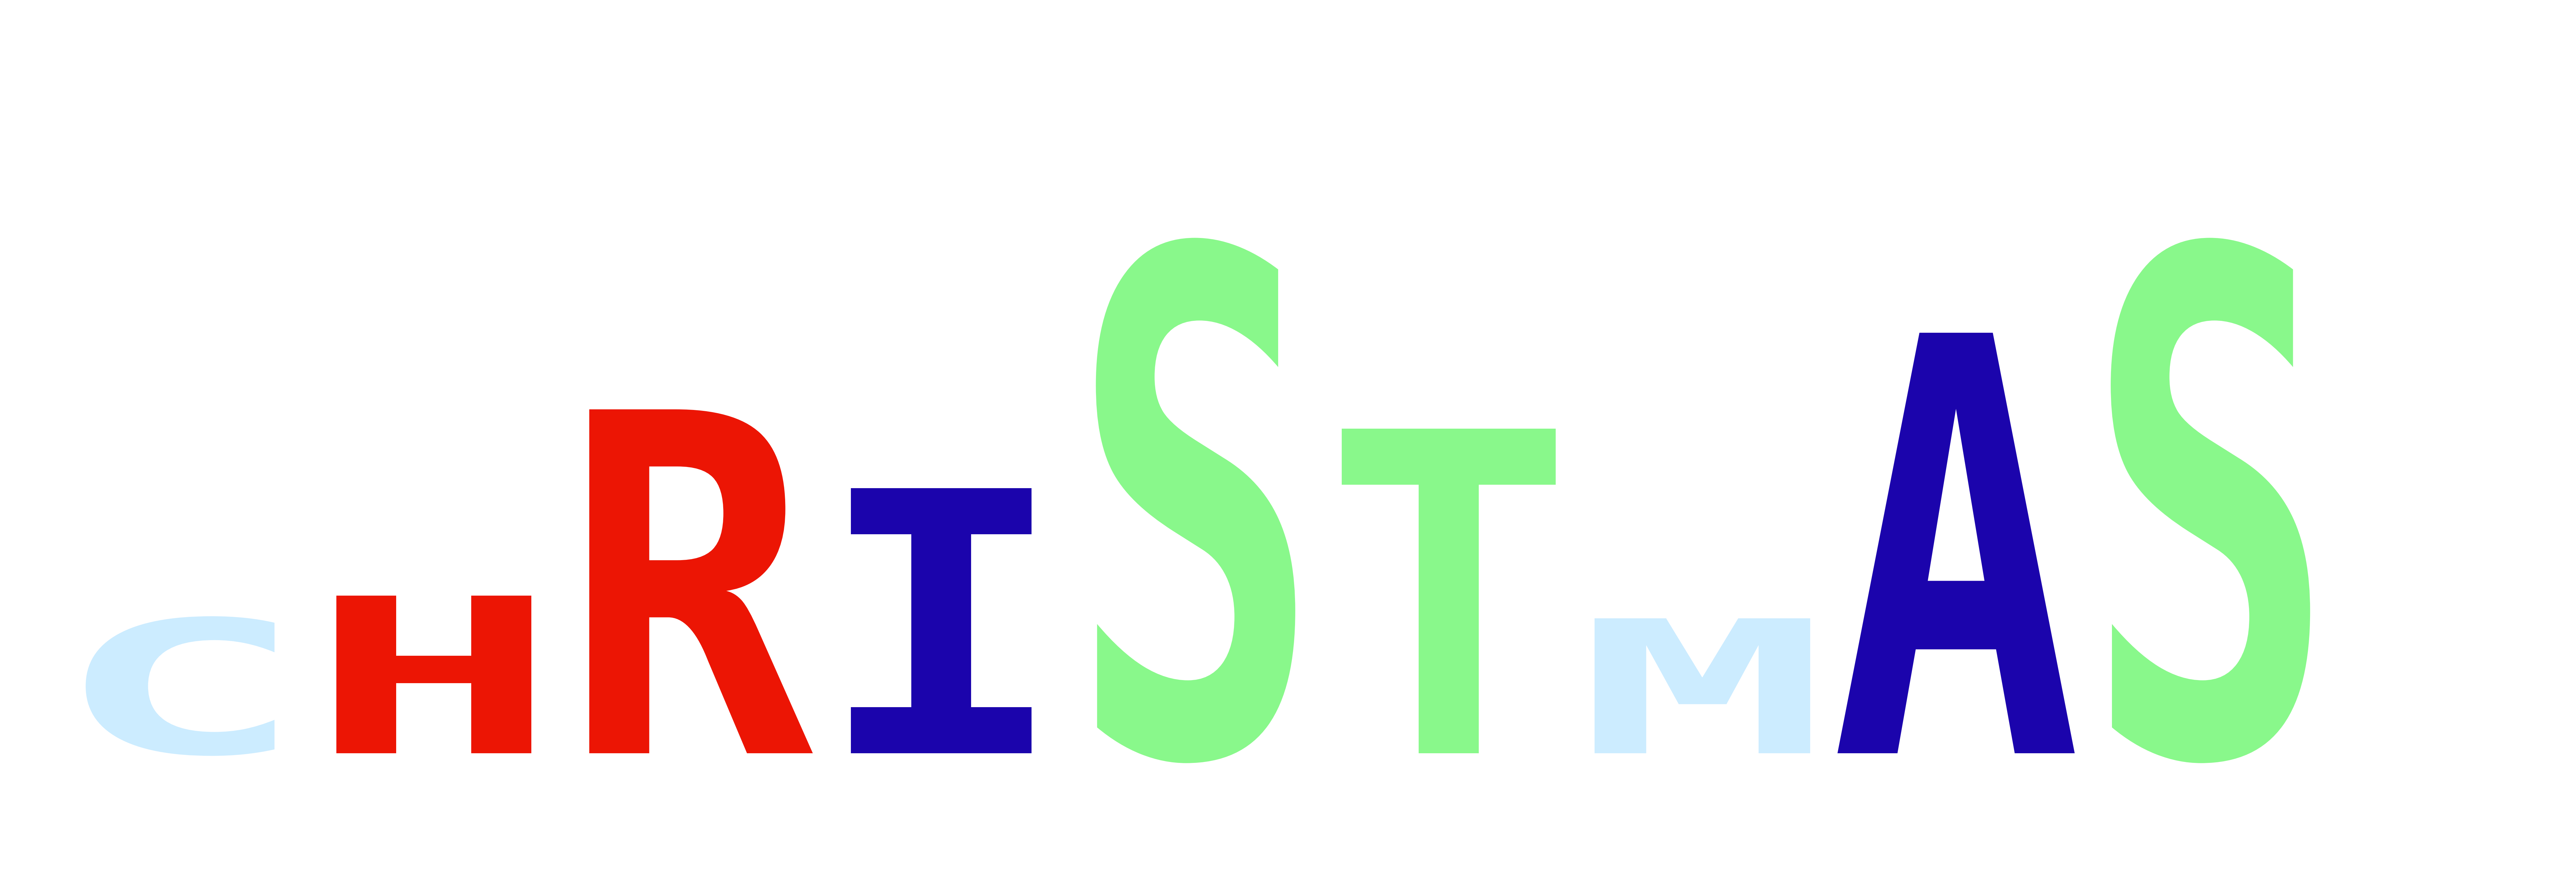

In [29]:
plt.rcParams['figure.dpi'] = 1000
plt.rcParams['savefig.dpi'] = 1000
_, _ = draw_logo(data_christmas, 
                 data_type='bits', 
                 colorscheme='physiochemical', 
                 yaxis='probability',
                 coordinate_type='display',
                 fontfamily='Monospace')
plt.savefig('christmas.png', dpi=1000)